In [1]:
import geopandas as gpd

OSError: could not find or load spatialindex_c-64.dll

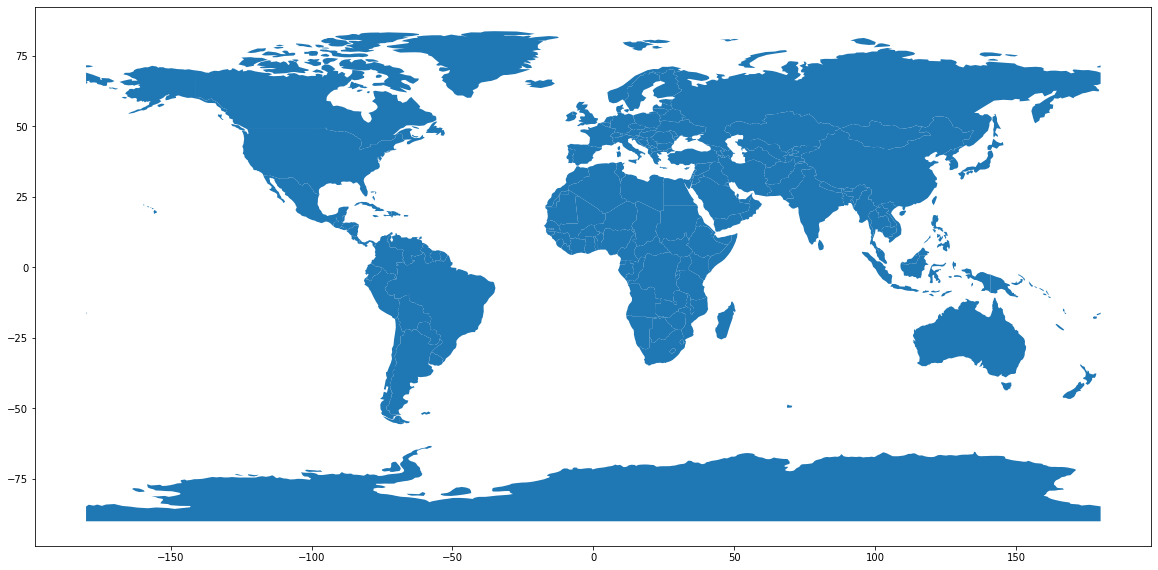

In [96]:
world.plot(figsize=(20,20));

In [97]:
world.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


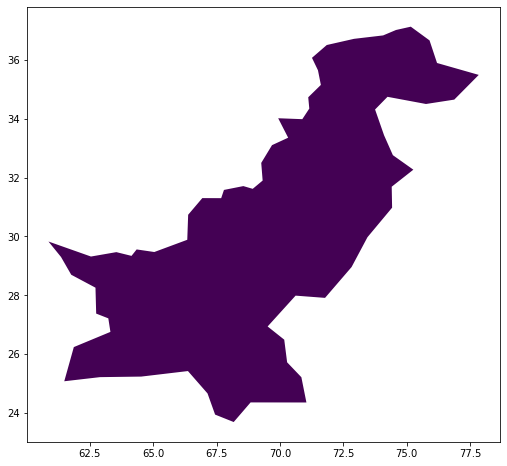

In [108]:
world = world[(world.pop_est>0) & (world.name == "Pakistan")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', figsize=(15,8));

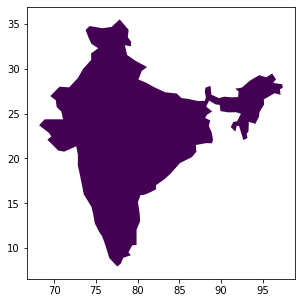

In [111]:
world = world[(world.pop_est>0) & (world.name =="India")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap', figsize=(15,5));

<AxesSubplot:>

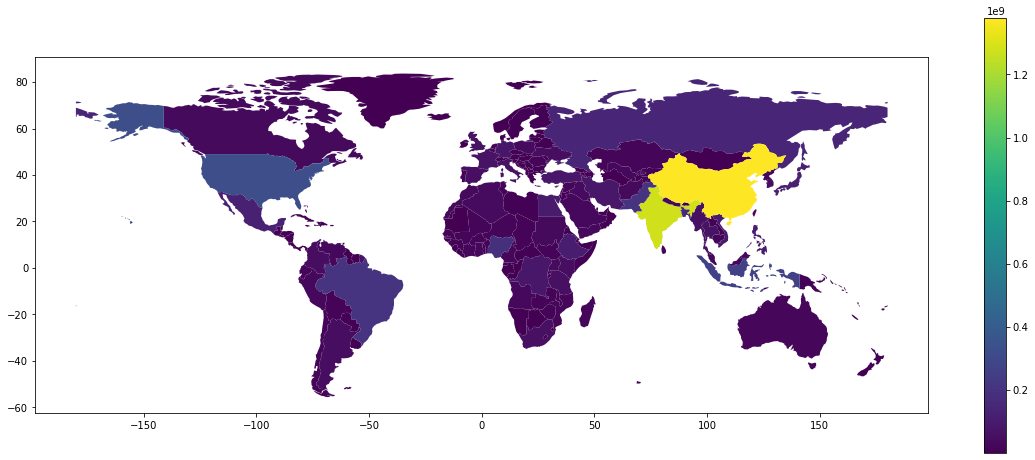

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(20,8))

world.plot(column='pop_est', ax=ax, legend=True, )

<AxesSubplot:>

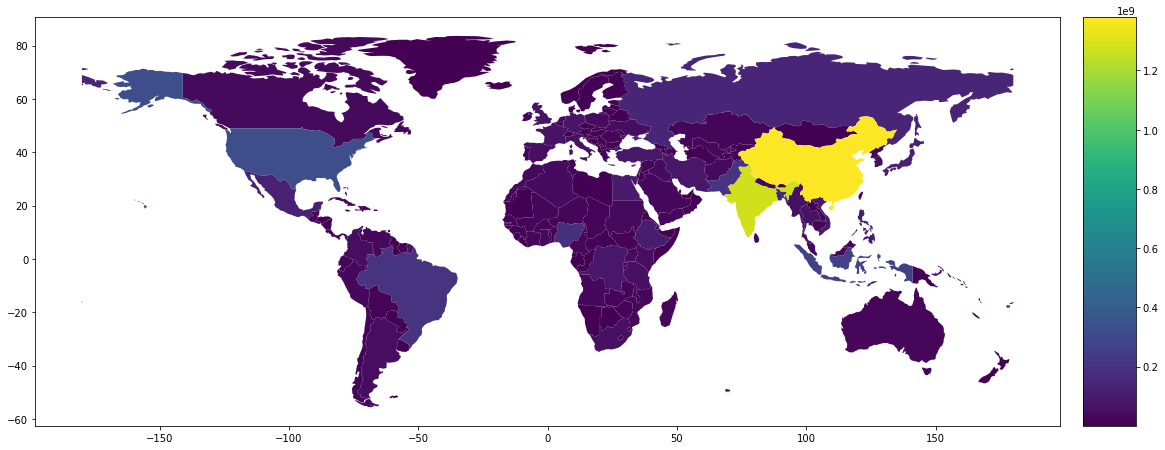

In [18]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1,figsize=(20,8))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

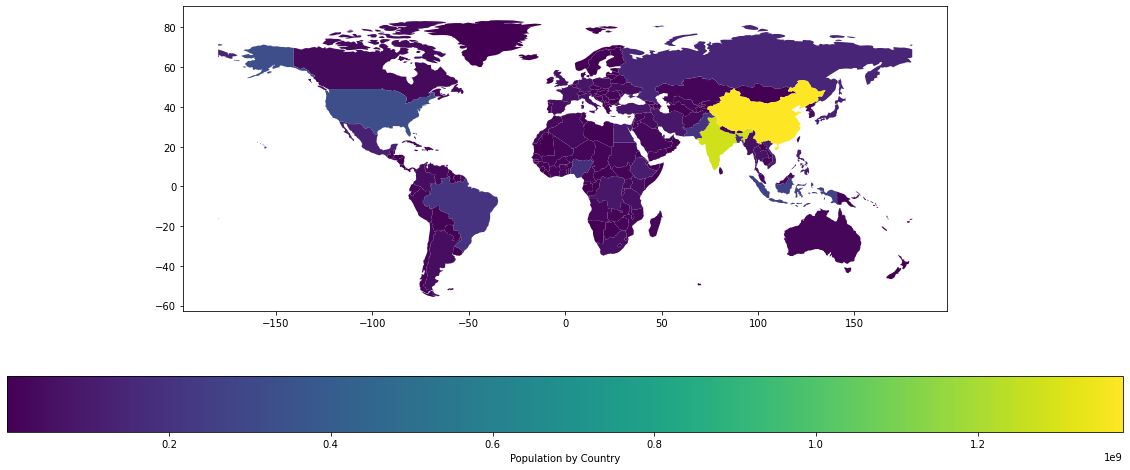

In [26]:
# Plot population estimates with an accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1,figsize=(20,8))

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

In [ ]:
# Cmap color codes
[('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

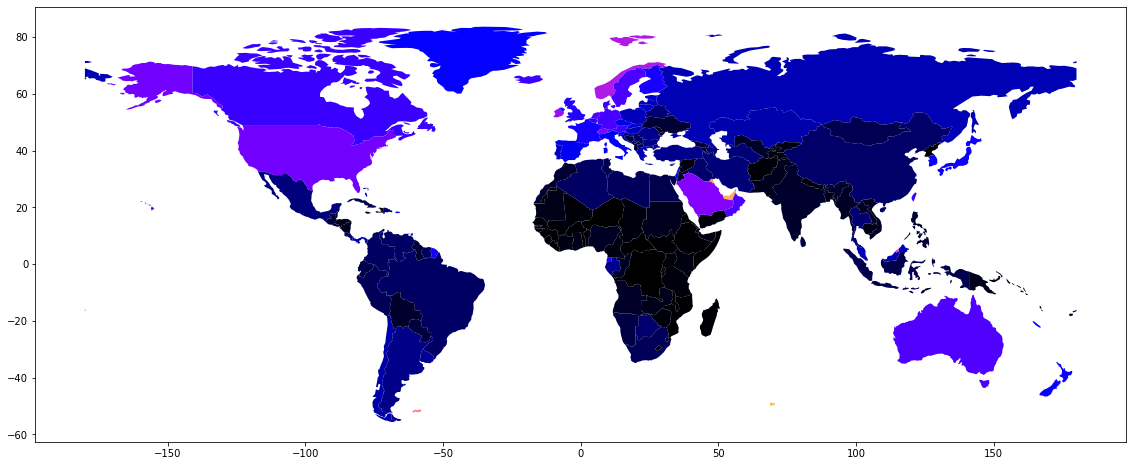

In [32]:
world.plot(column='gdp_per_cap', cmap='gnuplot2', figsize=(20,8));

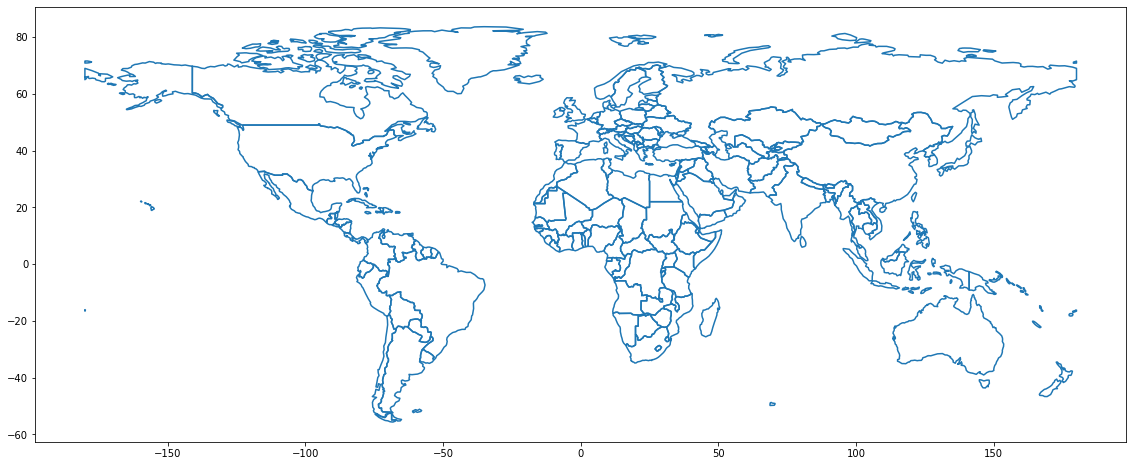

In [34]:
world.boundary.plot(figsize=(20,8));

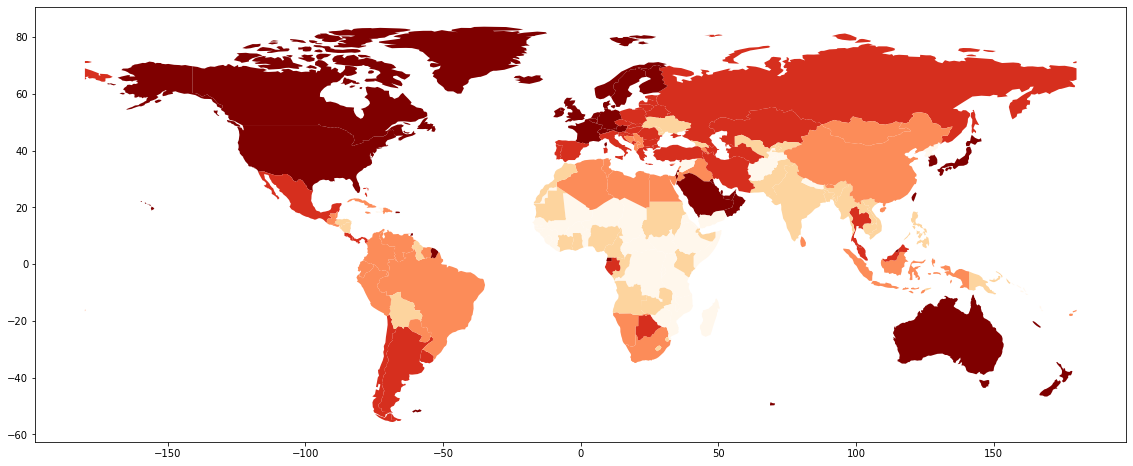

In [35]:
 world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles',figsize=(20,8) );

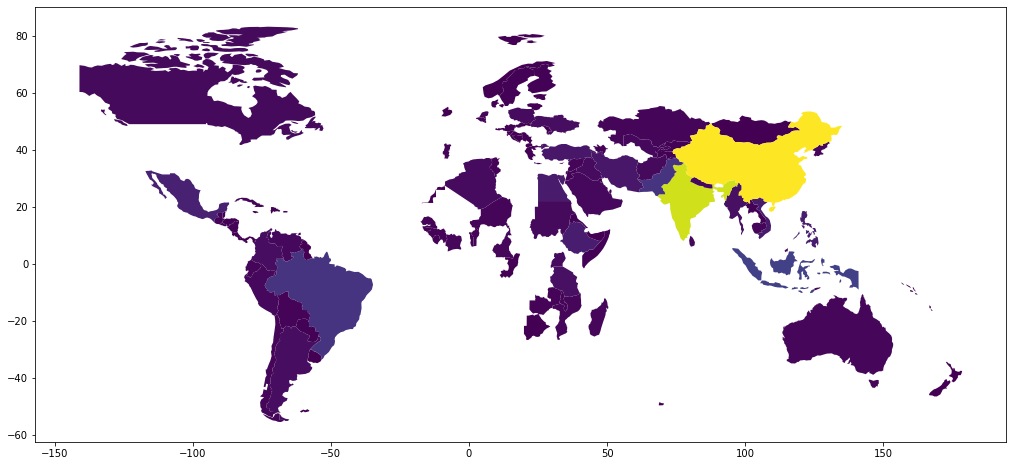

In [37]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan

world.plot(column='pop_est', figsize=(20,8));

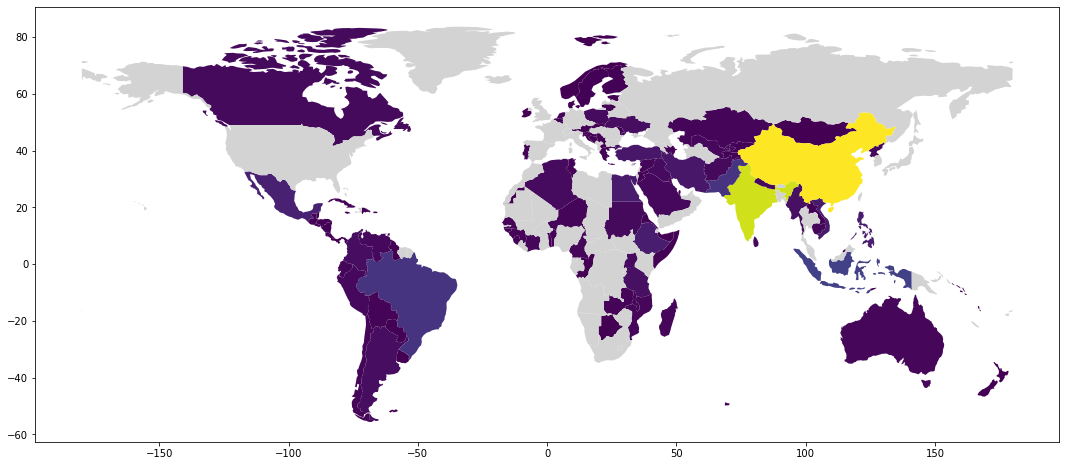

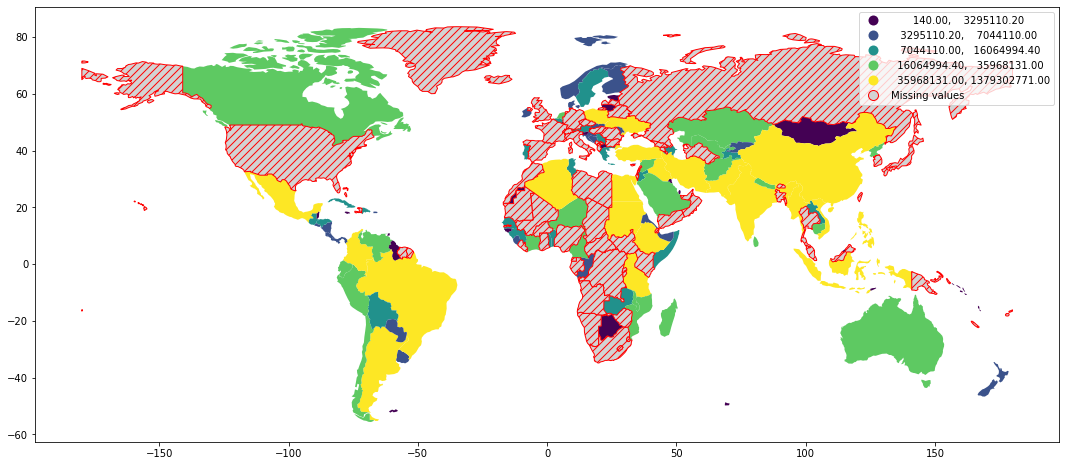

In [40]:
world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'},  figsize=(20,8));

In [26]: world.plot(
        column="pop_est",
        legend=True,
        scheme="quantiles",
         figsize=(20,8),
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",
        },
    );

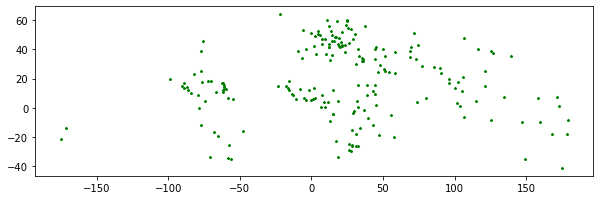

In [43]:
# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5, figsize=(10,5));

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

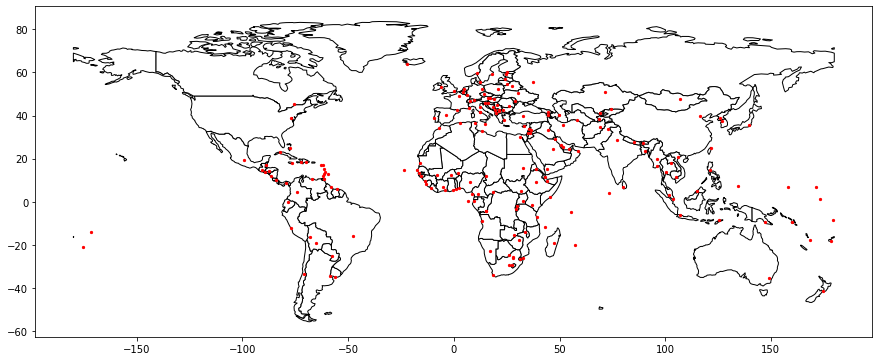

In [48]:
base = world.plot(color='white', edgecolor='black', figsize=(15,8))

cities.plot(ax=base, marker='o', color='red', markersize=5);

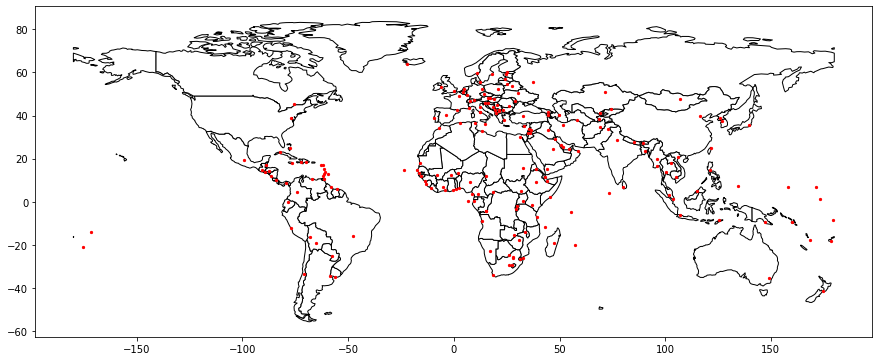

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')

# plt.show();
cities.plot(ax=ax, marker='o', color='red', markersize=5 )


plt.show();

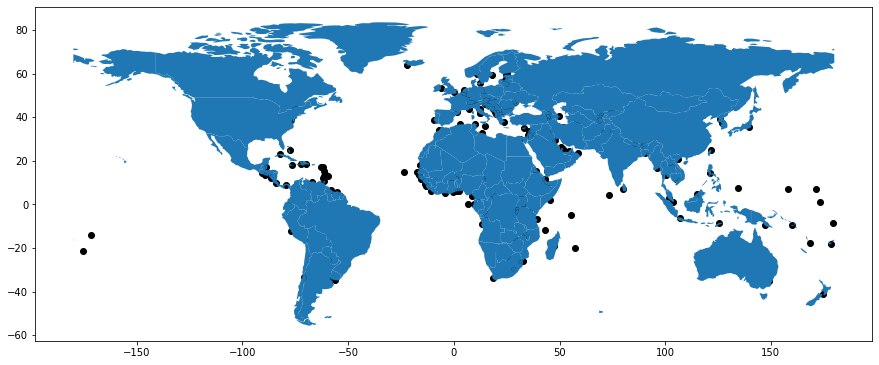

In [57]:
ax = cities.plot(color='k', figsize=(15,8))

world.plot(ax=ax);

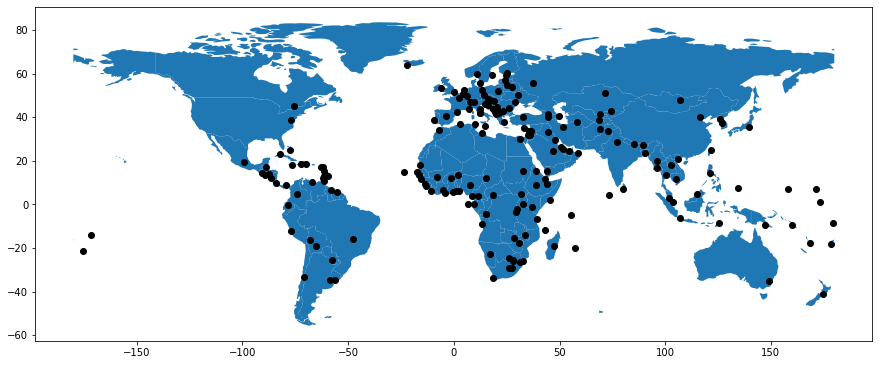

In [73]:
ax = cities.plot(color='k', zorder=2, figsize=(15,8))

world.plot(ax=ax, zorder=1);

<AxesSubplot:>

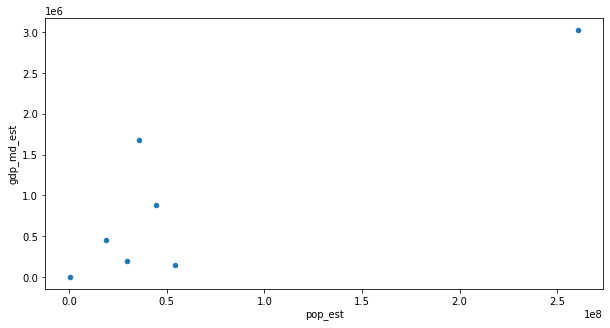

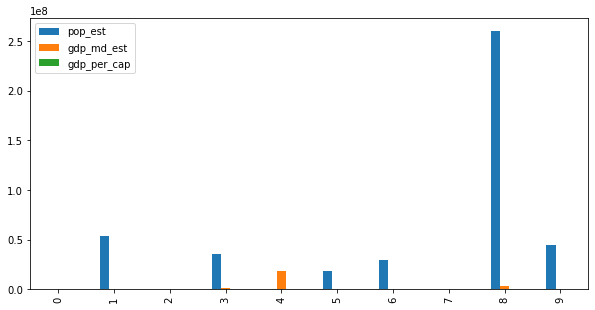

In [77]:
gdf = world.head(10)

gdf.plot(kind='scatter', x="pop_est", y="gdp_md_est", figsize=(10,5))

gdf.plot.bar(figsize=(10,5))